# Homework Data Cleaning Python

- Nama: Maulani Candra
- IPK / Nilai Rapot: -

Catatan:
1. Boleh google, YOLO apalagi biar ada gregetnya
2. Boleh dikerjakan sambil makan, push rank, skripsian, tesis, disertasi, nonton spiderman no way home, mengendarai pesawat terbang, terbang kebulan, tapi ga boleh dikerjakan sama mantan.
3. Kalau mau nyontek, `main rapih ya`, kalau ketauan jawabannya sama persis / similarity score > 80%, dua-duanya mendapatkan nilai 0 (Udah banyak korban di batch-batch sebelumnya)
4. Mohon ganti nama file sebagaimana mestinya, sesuai EYD dan tata penulisan yang diakui multiverse
5. Keterangan dataset (informasi kolom-kolom) bisa diakses disini https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning (100 pts)

Divisi kamu memiliki OKR (Objective Key Result) yang salah satu initiative nya adalah ingin melakukan resurrection pada churn user serta preventing churn based on user behavior hingga bisa mendapatkan 25% churn user pada Q1 2022. Langkah pertama yang ingin di automasi adalah ingin menebak apakah user tertentu masuk dalam kategori churn atau tidak. 

Kamu sebagai data scientist, sebelum melakukan pemodelan, kamu perlu untuk membersihkan dan menyiapkan data agar bisa digunakan untuk keperluan yang ada.

> Lakukanlah pembersihan data pada data telco ini, pembersihan data dapat meliputi **seluruh** metode yang telah dipelajari di kelas, meliputi a) Handle Missing Value and Duplicated Rows (20 pts); b) Outlier Management (30 pts); c) Feature Transformation (Numerical and Categorical) (50 pts)

**Catatan**
- Tidak ada standarisasi harus mengikuti langkah-langkah yang mana, semakin lengkap, semakin bagus skornya. Ingat, ketika ingin train model ML, maka seluruh feature yang ada wajib berupa numerical value.

In [2]:
df_homework = pd.read_csv("session_9_homework_telco.csv")
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Kerjakan disini ya, Good Luck

In [3]:
# Find out the dimension of data
df_homework.shape

(7043, 21)

# 1. Handle Missing Value and Duplicate Rows

## a. Sigma Rule for Feature Removal

In [4]:
# Find out if there is any potential of duplicated columns or not based on column names
df_homework.columns

# There is no suspected duplicate column

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Find out the data type
df_homework.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# TotalCharge Data type is object. TotalCharge needed to be replace to float
df_homework ["TotalCharges"] = pd.to_numeric(df_homework.TotalCharges,errors = 'coerce')
df_homework.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Find out if there is any potential of duplicated rows
df_homework.duplicated().sum()

# There is no duplicate row

0

In [8]:
# Find out if there is Missing Value Information
df_homework.isnull().sum()

# There is 11 or  missing value information at TotalCharges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Missing Value Information in Percentage
(100.00 * df_homework.isnull().sum()) / df_homework.shape[0]

# Missing value is 15.6183% of TotalCharge

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [10]:
df_homework['TotalCharges'].nunique()

6530

In [11]:
df_homework["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Since TotalCharges feature has relatively high gap between max and min value and high standard deviation, so its better to transform into categorical. First of all, we should fill the null values with median based on "gender", "SeniorCitizen", "Partner", "Dependents" to shape better pattern of data.

In [12]:
# Missing value handling
df_homework["TotalCharges"] = df_homework.groupby(["gender", "SeniorCitizen", "Partner", "Dependents"])["TotalCharges"].apply(lambda x: x.fillna(x.median()))
# Create age group by 10 groups
df_homework["TotalCharges"] = pd.qcut(df_homework["TotalCharges"], 10)
df_homework["TotalCharges"].head()

0       (18.799, 84.61]
1    (1399.35, 2043.71]
2       (84.61, 267.37]
3    (1399.35, 2043.71]
4       (84.61, 267.37]
Name: TotalCharges, dtype: category
Categories (10, interval[float64, right]): [(18.799, 84.61] < (84.61, 267.37] < (267.37, 552.82] <
                                            (552.82, 946.7] ... (2043.71, 3132.75] <
                                            (3132.75, 4471.44] < (4471.44, 5973.69] <
                                            (5973.69, 8684.8]]

In [13]:
# TotalCharges group distribution by customerID
df_homework.groupby(["TotalCharges"])["customerID"].count()

TotalCharges
(18.799, 84.61]       705
(84.61, 267.37]       704
(267.37, 552.82]      704
(552.82, 946.7]       704
(946.7, 1399.35]      705
(1399.35, 2043.71]    704
(2043.71, 3132.75]    705
(3132.75, 4471.44]    703
(4471.44, 5973.69]    704
(5973.69, 8684.8]     705
Name: customerID, dtype: int64

In [14]:
df_homework.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1574,5312-TSZVC,Female,0,No,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,"(267.37, 552.82]",No
4721,4211-MMAZN,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,"(18.799, 84.61]",Yes
6381,0927-CNGRH,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,"(18.799, 84.61]",No
5167,4188-PCPIG,Female,0,Yes,No,57,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),70.35,"(3132.75, 4471.44]",No
1980,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,"(946.7, 1399.35]",No


## 2. Handle Outlier

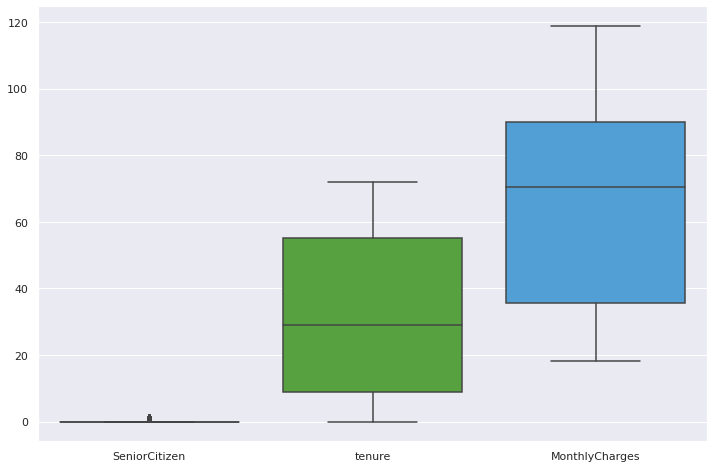

In [15]:
# Use Boxplot

# Figure Size Setting
plt.figure(figsize=(12,8))

# Boxplot using Seaborn
sns.boxplot(data=df_homework, 
            palette="husl")

# Show the plot
plt.show()

# No outlier found
# There is no outlier at "Senior Citizen" because the data is 0 or 1
# Therefore, data removal is not needed

## 3. Feature Transformation

# a. Numerical (Grouping)

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Make a copy for an experiment
df_homework = df_homework.copy()
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,"(18.799, 84.61]",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,"(1399.35, 2043.71]",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,"(84.61, 267.37]",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,"(1399.35, 2043.71]",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,"(84.61, 267.37]",Yes


In [17]:
for i in df_homework.columns:
    total_unique_values = len(df_homework[i].unique())
    print(f"Unique value of {i} is {total_unique_values}")

Unique value of customerID is 7043
Unique value of gender is 2
Unique value of SeniorCitizen is 2
Unique value of Partner is 2
Unique value of Dependents is 2
Unique value of tenure is 73
Unique value of PhoneService is 2
Unique value of MultipleLines is 3
Unique value of InternetService is 3
Unique value of OnlineSecurity is 3
Unique value of OnlineBackup is 3
Unique value of DeviceProtection is 3
Unique value of TechSupport is 3
Unique value of StreamingTV is 3
Unique value of StreamingMovies is 3
Unique value of Contract is 3
Unique value of PaperlessBilling is 2
Unique value of PaymentMethod is 4
Unique value of MonthlyCharges is 1585
Unique value of TotalCharges is 10
Unique value of Churn is 2


customerID, tenure, and MonthlyCharges has many unique value

In [18]:
# Dropping Customer ID
df_homework = df_homework.drop(["customerID"], axis=1)

In [19]:
# Create Monthly group by 10 groups
df_homework["MonthlyCharges"] = pd.qcut(df_homework["MonthlyCharges"], 10)
df_homework["MonthlyCharges"].head()

0    (25.05, 45.85]
1    (45.85, 58.83]
2    (45.85, 58.83]
3    (25.05, 45.85]
4     (70.35, 79.1]
Name: MonthlyCharges, dtype: category
Categories (10, interval[float64, right]): [(18.249, 20.05] < (20.05, 25.05] < (25.05, 45.85] <
                                            (45.85, 58.83] ... (79.1, 85.5] < (85.5, 94.25] <
                                            (94.25, 102.6] < (102.6, 118.75]]

In [20]:
# Create tenure group by 10 groups
df_homework["tenure"] = pd.qcut(df_homework["tenure"], 10)
df_homework["tenure"].head()

0    (-0.001, 2.0]
1     (29.0, 40.0]
2    (-0.001, 2.0]
3     (40.0, 50.0]
4    (-0.001, 2.0]
Name: tenure, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 2.0] < (2.0, 6.0] < (6.0, 12.0] < (12.0, 20.0] <
                                            ... < (40.0, 50.0] < (50.0, 60.0] <
                                            (60.0, 69.0] < (69.0, 72.0]]

## 3. Categorical Encoding

In [21]:
# Checking Data
def different (dataframe):
  for i in dataframe:
    if dataframe[i].dtypes == 'object':
      print(f'{i}: {dataframe[i].unique()}')

different (df_homework)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
df_homework["MultipleLines"].replace({"No phone service": "No"}, inplace= True)
df_homework["OnlineSecurity"].replace({"No internet service": "No"}, inplace= True)
df_homework["OnlineBackup"].replace({"No internet service": "No"}, inplace= True)
df_homework["DeviceProtection"].replace({"No internet service": "No"}, inplace= True)
df_homework["TechSupport"].replace({"No internet service": "No"}, inplace= True)
df_homework["StreamingTV"].replace({"No internet service": "No"}, inplace= True)
df_homework["StreamingMovies"].replace({"No internet service": "No"}, inplace= True)

df_homework.sample (5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5076,Female,0,Yes,Yes,"(29.0, 40.0]",Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,"(85.5, 94.25]","(2043.71, 3132.75]",Yes
6674,Male,0,No,No,"(6.0, 12.0]",Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,"(20.05, 25.05]","(84.61, 267.37]",No
3443,Male,1,Yes,No,"(29.0, 40.0]",Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),"(94.25, 102.6]","(3132.75, 4471.44]",No
6044,Female,0,No,Yes,"(6.0, 12.0]",Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"(70.35, 79.1]","(552.82, 946.7]",No
3641,Female,0,No,No,"(40.0, 50.0]",Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"(70.35, 79.1]","(3132.75, 4471.44]",No


In [23]:
# Replace Yes and No
replace_column = ["Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                  "StreamingMovies", "PaperlessBilling", "Churn", "MultipleLines"]
for i in replace_column:
  df_homework[i].replace({"Yes":1, "No":0}, inplace=True)

df_homework["gender"].replace({"Male": 1, "Female" : 0}, inplace= True)

df_homework.sample (5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1338,1,0,0,0,"(-0.001, 2.0]",1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,"(20.05, 25.05]","(18.799, 84.61]",1
4757,1,0,0,0,"(-0.001, 2.0]",1,1,DSL,0,1,0,1,0,0,Month-to-month,0,Mailed check,"(58.83, 70.35]","(18.799, 84.61]",1
5035,1,0,0,0,"(12.0, 20.0]",1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,0,Electronic check,"(70.35, 79.1]","(1399.35, 2043.71]",0
4946,1,0,0,0,"(2.0, 6.0]",1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,"(79.1, 85.5]","(267.37, 552.82]",1
3376,0,0,1,1,"(-0.001, 2.0]",1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,"(18.249, 20.05]","(18.799, 84.61]",0


In [24]:
# One-hot Encoding
# PaymentMethod
df_homework["PaymentMethod"].value_counts().reset_index()

,index,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [25]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework = pd.get_dummies(df_homework,columns = ["PaymentMethod"])
df_homework.iloc[19]

gender                                                      0
SeniorCitizen                                               0
Partner                                                     0
Dependents                                                  0
tenure                                           (20.0, 29.0]
PhoneService                                                1
MultipleLines                                               0
InternetService                                   Fiber optic
OnlineSecurity                                              0
OnlineBackup                                                1
DeviceProtection                                            1
TechSupport                                                 0
StreamingTV                                                 0
StreamingMovies                                             1
Contract                                       Month-to-month
PaperlessBilling                                            1
MonthlyC

In [26]:
# 2. Ordinal Encoding applied for ordinal data scale 

# Lets use InternetService -> Based on Speed Level
df_homework["InternetService"].value_counts().reset_index()

,index,InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [27]:
# Use .map(class) to replace value by value using dictionary

internet_conn = {"No": 0, 
                "DSL": 1,
                "Fiber optic": 2}

df_homework["InternetConnection"] = df_homework["InternetService"].map(internet_conn)
df_homework[["InternetService","InternetConnection"]].sample(10)

,InternetService,InternetConnection
3878,Fiber optic,2
1705,Fiber optic,2
6985,DSL,1
761,Fiber optic,2
1445,Fiber optic,2
2375,Fiber optic,2
5160,Fiber optic,2
4755,Fiber optic,2
3138,DSL,1
3463,Fiber optic,2


In [28]:
df_homework.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection
6842,1,0,0,0,"(12.0, 20.0]",1,0,No,0,0,0,0,0,0,One year,1,"(18.249, 20.05]","(84.61, 267.37]",0,0,0,0,1,0
997,0,1,0,0,"(2.0, 6.0]",1,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,"(94.25, 102.6]","(267.37, 552.82]",1,0,0,1,0,2


In [29]:
# Dropping InternetService
df_homework = df_homework.drop(["InternetService"], axis=1)

In [30]:
df_homework.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection
1951,1,0,1,0,"(12.0, 20.0]",1,0,0,0,1,0,0,0,Month-to-month,0,"(45.85, 58.83]","(552.82, 946.7]",0,0,1,0,0,1
6237,1,0,0,0,"(-0.001, 2.0]",1,0,0,0,0,0,0,0,Month-to-month,0,"(58.83, 70.35]","(18.799, 84.61]",1,0,0,1,0,2


In [31]:
# Lets use Contract
df_homework["Contract"].value_counts().reset_index()

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [32]:
# Use .map(class) to replace value by value using dictionary

contract_class = {"Month-to-month": 1, 
                "One year": 2,
                "Two year": 3}

df_homework["ContractClass"] = df_homework["Contract"].map(contract_class)
df_homework[["Contract","ContractClass"]].sample(10)

,Contract,ContractClass
4397,Two year,3
5380,Month-to-month,1
4758,Two year,3
4923,Month-to-month,1
6270,Two year,3
2823,Two year,3
4255,One year,2
29,Month-to-month,1
6483,Month-to-month,1
6880,Two year,3


In [33]:
# Dropping InternetService
df_homework = df_homework.drop(["Contract"], axis=1)

In [34]:
# Replace high cardinality data "tenure", "MonthlyCharges", and "TotalCharges"
high_cardinality_data = ["tenure","MonthlyCharges", "TotalCharges"]

for feature in high_cardinality_data:        
    df_homework[feature] = LabelEncoder().fit_transform(df_homework[feature])

df_homework = pd.get_dummies(df_homework)
df_homework.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection,ContractClass
5098,1,1,0,0,1,1,1,0,0,0,0,0,0,1,5,1,1,0,0,1,0,2,1
1137,1,0,1,1,9,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,3
3727,0,0,0,0,1,1,1,0,0,0,0,1,1,1,8,2,1,0,0,1,0,2,1
2059,1,0,1,1,5,1,1,0,1,1,0,1,0,1,7,7,0,0,0,1,0,2,1
6087,1,0,0,1,4,0,0,0,1,0,0,1,0,1,2,4,0,1,0,0,0,1,2
4143,1,0,0,0,4,1,1,0,0,0,0,0,1,1,6,5,1,0,0,1,0,2,1
6420,1,0,1,0,5,1,1,0,0,0,1,0,0,1,6,6,0,0,0,1,0,2,2
4268,1,0,1,1,5,1,0,0,1,0,1,1,0,1,7,7,0,0,0,1,0,2,2
3513,1,0,1,1,2,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1
6262,0,0,0,0,6,1,1,1,1,0,0,0,1,0,8,7,0,1,0,0,0,2,2


In [35]:
# Finish
df_homework.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection,ContractClass
1707,0,1,0,0,1,1,0,0,0,1,0,0,0,0,5,1,0,0,0,1,0,2,1
2451,1,0,1,1,4,1,1,1,1,0,0,1,1,0,9,6,1,0,0,1,0,2,2
3303,0,0,0,0,1,1,1,0,1,0,0,0,0,0,5,2,1,1,0,0,0,2,1
1207,0,0,0,1,2,1,0,0,0,0,1,1,1,1,4,3,0,0,1,0,0,1,1
2484,1,0,1,1,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
5300,0,0,1,1,0,1,0,0,0,0,0,1,0,1,6,0,1,0,0,0,1,2,1
2764,1,0,1,1,5,1,1,1,1,1,1,0,0,0,4,5,0,0,0,1,0,1,1
6179,0,1,0,0,2,1,1,0,0,0,0,1,1,1,8,4,1,1,0,0,0,2,1
6626,1,1,1,0,1,1,0,0,0,1,0,1,1,1,8,3,1,0,0,1,0,2,1
371,1,0,0,0,0,1,1,0,0,0,0,1,0,1,7,1,1,0,0,1,0,2,1
